In [78]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import  matplotlib.pyplot as plt
import math

In [79]:
df=pd.read_csv("G:\data\housing.csv")

In [80]:
df


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [81]:
ddf=df[["median_income","median_house_value"]]
data_housing_median_income=ddf.iloc[:20,:20]

In [82]:
data_housing_median_income

,median_income,median_house_value
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0
5,4.0368,269700.0
6,3.6591,299200.0
7,3.1200,241400.0
8,2.0804,226700.0
9,3.6912,261100.0


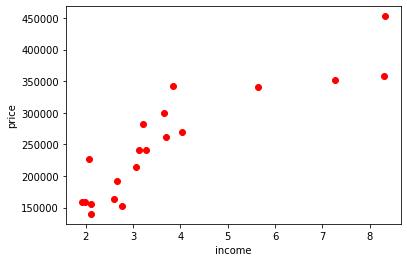

In [83]:
%matplotlib inline
plt.xlabel('income')
plt.ylabel('price')
#plt.xscale("log")
#plt.yscale("log")
plt.scatter(data_housing_median_income.median_income,data_housing_median_income.median_house_value,color='red')


In [84]:
price=data_housing_median_income.median_house_value
price

0     452600.0
1     358500.0
2     352100.0
3     341300.0
4     342200.0
5     269700.0
6     299200.0
7     241400.0
8     226700.0
9     261100.0
10    281500.0
11    241800.0
12    213500.0
13    191300.0
14    159200.0
15    140000.0
16    152500.0
17    155500.0
18    158700.0
19    162900.0
Name: median_house_value, dtype: float64

In [85]:
income = data_housing_median_income.drop('median_house_value',axis='columns')
income

,median_income
0,8.3252
1,8.3014
2,7.2574
3,5.6431
4,3.8462
5,4.0368
6,3.6591
7,3.1200
8,2.0804
9,3.6912


In [86]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(income,price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
reg.coef_

array([38134.0826436])

In [88]:
reg.intercept_

105720.23132486863

In [89]:
reg.predict([[10]])

array([487061.05776091])

In [90]:
dddf=df[["median_income"]]
ddddf=df[["median_house_value"]]
fd=ddddf[20:30]
prediction_df=dddf.iloc[20:30]
original=dddf.iloc[20:30]

In [91]:
p=reg.predict(prediction_df)

In [99]:
original["predited"]=p/10000

C:\Users\CHAITANYA\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [100]:
original["original_value"]=fd.median_house_value/10000


C:\Users\CHAITANYA\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [104]:
original["diff"]=(((p-fd.median_house_value)*(p-fd.median_house_value))**0.5)/10000



C:\Users\CHAITANYA\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [105]:
original

,median_income,predited,original_value,diff
20,1.3578,15.749869,14.75,0.999869
21,1.7135,17.106298,15.98,1.126298
22,1.7250,17.150152,11.39,5.760152
23,2.1806,18.887541,9.97,8.917541
24,2.6000,20.486885,13.26,7.226885
25,2.4038,19.738694,10.75,8.988694
26,2.4597,19.951863,9.38,10.571863
27,1.8080,17.466665,10.55,6.916665
28,1.6424,16.835165,10.89,5.945165
29,1.6875,17.007150,13.20,3.807150
